# NLP Assignment 2

Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.
In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.
For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!
We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.
Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
This data consists of two columns. - Comment - Emotion
Comment are the statements or messages regarding to a particular event/situation.
Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.
As there are only 3 classes, this problem comes under the 


 :using the sklearn pipeline module create a classification pipeline to classify the Data.
use CountVectorizer with both unigram and Bigrams.
use  as the classifier.
print the classification report.
 :using the sklearn pipeline module create a classification pipeline to classify the Data.
use  for Pre-processing the text.
use  as the classifier.
print the classification report.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
df_train=pd.read_table('/content/train.txt', delimiter=';', header=None)
df_train.columns=['Text','Label']
df_train.head(10)

,Text,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [3]:
df_test=pd.read_table('/content/test.txt', delimiter=';', header=None)
df_test.columns=['Text','Label']

df_val=pd.read_table('/content/val.txt', delimiter=';', header=None)
df_val.columns=['Text','Label']

df_test.head()

,Text,Label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [4]:
df_val.head()

,Text,Label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [5]:
df_train['Label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

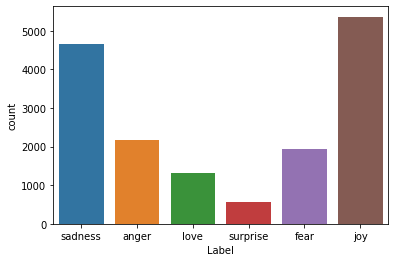

In [6]:
sns.countplot(df_train['Label'])

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_train['Text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram

,frequency,bigram/trigram
0,1756,feel like
1,885,im feeling
2,206,feeling little
3,191,like im
4,172,still feel
...,...,...
207689,1,aaaaand tis
207690,1,aa meeting today
207691,1,aa meeting hear
207692,1,aa full force


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train['Text'])
X_train_counts.shape

(16000, 15186)

## TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16000, 15186)

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df_train['Label'])

In [15]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(df_train['Text'], df_train['Label'])

In [16]:
import numpy as np

predicted = text_clf.predict(df_test['Text'])
np.mean(predicted == df_test['Label'])

0.6485

In [17]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(df_train['Text'], df_train['Label'])
predicted_svm = text_clf_svm.predict(df_test['Text'])
np.mean(predicted_svm == df_test['Label'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8755